# Facial Age Estimation Model 

 Our Facial Age group Estimation Model is built and designed to predict the age group of individuals based on facial images.

 The model is for using Machien Learning model for face age group estimation using SVM.

#### and the following steps are used to build it:

#### Step 1 - Importing Required Libraries

In [ ]:
import os
import pickle

from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure, color
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

#### Step 2 -  Data Directory and Configuration

In [6]:
# prepare data
input_dir = 'Faces_images/dataset'
categories = ['0-3', '4+', '9+', '12+', '17+']

data = []
labels = []
for category_idx, category in enumerate(categories):
    for file in os.listdir(os.path.join(input_dir, category)):
        if file== '.DS_Store':
            continue
        img_path = os.path.join(input_dir, category, file)
        img = imread(img_path)
        # Convert the image to grayscale
        img_gray = color.rgb2gray(img)
        # Extract HOG features
        fd, hog_image = hog(img_gray, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(1, 1), visualize=True)
        # Rescale histogram for better visual representation
        hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
        data.append(fd)
        labels.append(category_idx)

data = np.asarray(data)
labels = np.asarray(labels)

#### Step 3- Dataset Splitting to Training,and Testing Sets

In [ ]:
# train / test split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True, stratify=labels)

#### Step 4- Hyperparameter Tuning using Grid Search

In [7]:
# train classifier
classifier = SVC(kernel='rbf')

parameters = [{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}]

grid_search = GridSearchCV(classifier, parameters)

%time grid_search.fit(x_train, y_train)

CPU times: user 11h 24min 56s, sys: 5min 30s, total: 11h 30min 27s
Wall time: 11h 41min 2s


GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}])

In [10]:
print(best_estimator)

SVC(C=10, gamma=0.01)


#### Step 5- Using the best parameters for predicitons and evaluate the performance.

In [9]:
# test performance
best_estimator = grid_search.best_estimator_

y_prediction = best_estimator.predict(x_test)

score = accuracy_score(y_test, y_prediction)

print('{}% of samples were correctly classified'.format(str(score * 100)))

64.47445684086905% of samples were correctly classified


#### Step 6 - Evaluating the Model

##### Confusion matrix

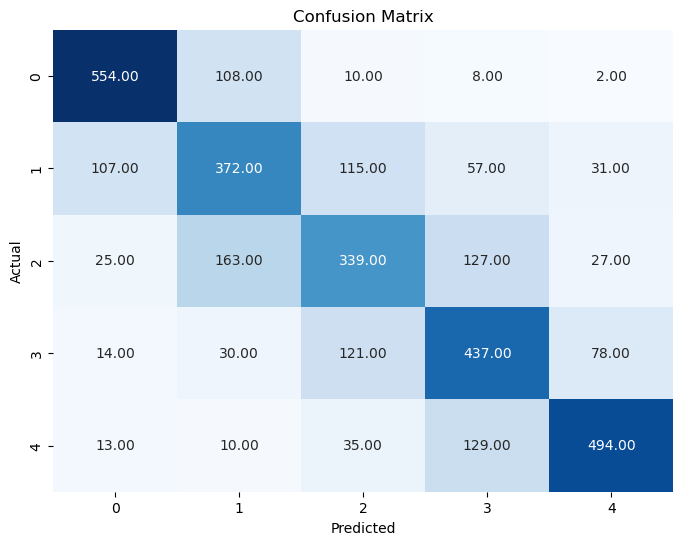

In [12]:

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_prediction)


# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##### Classifiacation Report

In [13]:
# Compute classification report
report = classification_report(y_test, y_prediction)

# Print the classification report
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.81      0.79       682
           1       0.54      0.55      0.55       682
           2       0.55      0.50      0.52       681
           3       0.58      0.64      0.61       680
           4       0.78      0.73      0.75       681

    accuracy                           0.64      3406
   macro avg       0.65      0.64      0.64      3406
weighted avg       0.65      0.64      0.64      3406



#### Step 8 and the last one- Saving the Model

In [23]:
with open('svm_model.pkl', 'wb') as file:
    pickle.dump(best_estimator, file)

#### Results: SVM is not the best for the data set since it has a 64.47% accuracy of the test set. While this falls short of being our best result.